# Mini-Project : Data Analysis for Marketing Strategy

---

## Dataset

The **Superstore Dataset** contains the following attributes:

- **Row ID**: Unique ID for each row.
- **Order ID**: Unique Order ID for each Customer.
- **Order Date**: Order Date of the product.
- **Ship Date**: Shipping Date of the Product.
- **Ship Mode**: Shipping Mode specified by the Customer.
- **Customer ID**: Unique ID to identify each Customer.
- **Customer Name**: Name of the Customer.
- **Segment**: The segment where the Customer belongs.
- **Country**: Country of residence of the Customer.
- **City**: City of residence of the Customer.
- **State**: State of residence of the Customer.
- **Postal Code**: Postal Code of every Customer.
- **Region**: Region where the Customer belongs.
- **Product ID**: Unique ID of the Product.
- **Category**: Category of the product ordered.
- **Sub-Category**: Sub-Category of the product ordered.
- **Product Name**: Name of the Product.
- **Sales**: Sales of the Product. **(in USD)**
- **Quantity**: Quantity of the Product.
- **Discount**: Discount provided.
- **Profit**: Profit/Loss incurred


---

## Task

First load the dataset in a notebook and preprocess it. Then use visualisations to address the following questions:

* Which states have the most sales?
What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)
* Who is an outstanding customer in New York?
* Are there any differences among states in profitability?
* The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)
* What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ? Are there any difference among cities in profitability ? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)
* What are the Top 20 customers by Sales?
* Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?
* Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin-1')

print('### Dataset Preview')
display(df.head())
print('\n### Dataset Information')
df.info()
print('\n### Dataset Summary Statistics')
display(df.describe(include='all'))

### Dataset Preview


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164



### Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-nul

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


There are no missing values. Many fields data type is not correct, for example `Ship Date` is presented as an object, when it should be in datetime format.

We proceed to check duplicates in the `Row ID` column:

In [3]:
duplicate_rows = df[df.duplicated(subset=['Row ID'], keep=False)]
print(f'Number of duplicate rows in `Row ID` column: {len(duplicate_rows)}')

Number of duplicate rows in `Row ID` column: 0


# EDA

## Which states have the most sales?

To address that we group by state and sum the `Sales` column:

In [4]:
df_grouped_by_state = df.groupby('State').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
df_grouped_by_state = df_grouped_by_state.sort_values(by='Sales', ascending=False)
print('### Top 10 States by Sales:')
display(df_grouped_by_state.head(10))

### Top 10 States by Sales:


,State,Sales,Profit
3,California,457687.6315,76381.3871
30,New York,310876.2710,74038.5486
41,Texas,170188.0458,-25729.3563
45,Washington,138641.2700,33402.6517
36,Pennsylvania,116511.9140,-15559.9603
8,Florida,89473.7080,-3399.3017
11,Illinois,80166.1010,-12607.8870
33,Ohio,78258.1360,-16971.3766
20,Michigan,76269.6140,24463.1876
44,Virginia,70636.7200,18597.9504


## What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)

In [5]:
difference_sales = df_grouped_by_state.loc[df_grouped_by_state['State'] == 'New York', 'Sales'].values[0] \
                  - df_grouped_by_state.loc[df_grouped_by_state['State'] == 'California', 'Sales'].values[0]
print(f'Difference between New York and California in terms of sales: {difference_sales}')

Difference between New York and California in terms of sales: -146811.3605


In [6]:
difference_profit = df_grouped_by_state.loc[df_grouped_by_state['State'] == 'New York', 'Profit'].values[0] \
                  - df_grouped_by_state.loc[df_grouped_by_state['State'] == 'California', 'Profit'].values[0]
print(f'Difference between New York and California in terms of profit: {difference_profit}')

Difference between New York and California in terms of profit: -2342.838499999998


**Note**: The negative sign is due the order the question was made: New York has less sales than California. If that information is not important, the code lines should include the `abs()` function.

## Who is an outstanding customer in New York?

In [7]:
# isolate New York rows
df_new_york = df.loc[df['State'] == 'New York']

# group by customer ID and order by sales
df_new_york_grouped = df_new_york.groupby('Customer ID').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
df_new_york_grouped = df_new_york_grouped.sort_values(by='Sales', ascending=False)
print('### Top 10 Customers by Sales in New York:')
display(df_new_york_grouped.head(10))

# get his ID
top_customer = df_new_york_grouped.iloc[0, 0]

# retrieve his name from the original df
top_customer_name = df.loc[df['Customer ID'] == top_customer, 'Customer Name'].values[0]
print(f'\ntop customer in New York is: {top_customer_name} (ID {top_customer}), with total sales: {df_new_york_grouped.iloc[0, 1]}')

### Top 10 Customers by Sales in New York:


,Customer ID,Sales,Profit
380,TA-21385,13723.498,4599.2073
309,PF-19120,7678.228,543.2819
373,SV-20365,7359.918,1571.7964
387,TB-21400,6999.960,2239.9872
169,GT-14710,6712.744,774.7935
402,TS-21370,6492.314,1574.9714
228,KD-16270,6241.282,2283.0463
230,KD-16495,5854.194,2510.8903
255,LW-17215,5048.186,773.1004
74,CJ-12010,5012.760,1300.0330



top customer in New York is: Tom Ashbrook (ID TA-21385), with total sales: 13723.498000000001


## Are there any differences among states in profitability?

Here we group by state then get their proffits (we already did that), then we plot it:


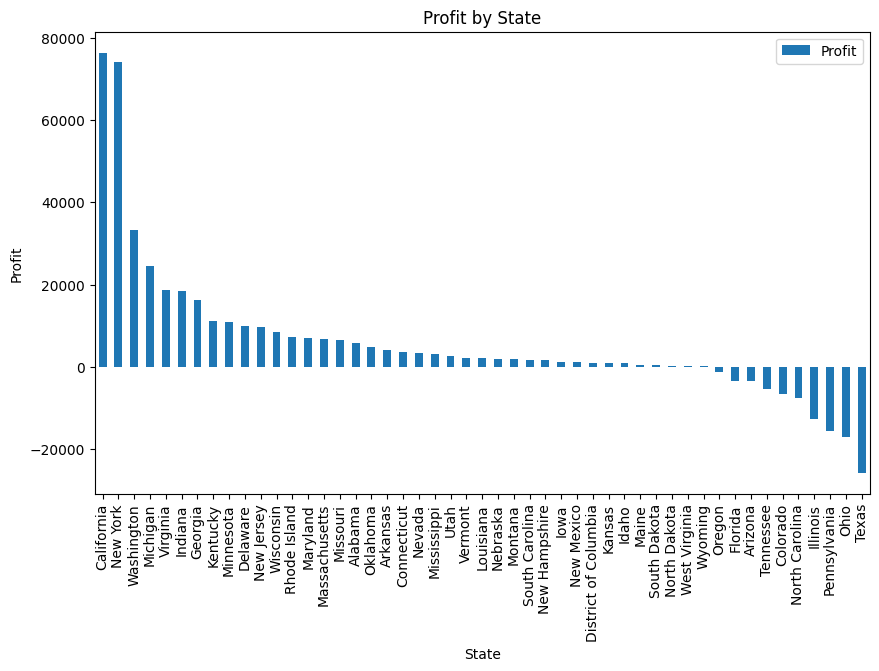

In [8]:
df_grouped_by_state.sort_values(by='Profit', ascending=False).plot(x='State', y='Profit', kind='bar',  figsize=(10, 6))
plt.title('Profit by State')
plt.xlabel('State')
plt.ylabel('Profit')
plt.show()

In [9]:
print('### top lossing states:')
display(df_grouped_by_state.sort_values(by='Profit', ascending=True).head(10))

### top lossing states:


,State,Sales,Profit
41,Texas,170188.0458,-25729.3563
33,Ohio,78258.1360,-16971.3766
36,Pennsylvania,116511.9140,-15559.9603
11,Illinois,80166.1010,-12607.8870
31,North Carolina,55603.1640,-7490.9122
4,Colorado,32108.1180,-6527.8579
40,Tennessee,30661.8730,-5341.6936
1,Arizona,35282.0010,-3427.9246
8,Florida,89473.7080,-3399.3017
35,Oregon,17431.1500,-1190.4705


We can see effectivelly there is a profit difference between states from the bar plot, and we can see also from the head and tail of df_grouped_by_state when sorted by profit column

## Pareto Principle

*The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)*



The bigger the sample, the better the statistic. That means we won't seggregate by state so we can have a bigger sample population across the whole dataset.

First we need to find the top 20 customers, then compare their cummulated sales values with the 80% of total sales

In [10]:
# group by customer
df_grouped_by_customer = df.groupby('Customer ID').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()


# ------------- taking sales as reference ----------------------

# 20 top customers by sales
total_sales_20_customers = df_grouped_by_customer['Sales'].head(20).sum()

# 80% general sales
total_sales_80_percent = df['Sales'].sum() * 0.8

# compare them
print(f'\ntop 20 customers sales vs 80% sales ratio is {total_sales_20_customers / total_sales_80_percent:.2f}')



# ------------- taking profit as reference ----------------------

# 20 top customers by profit
total_profit_20_customers = df_grouped_by_customer['Profit'].head(20).sum()

# 80% general sales
total_profit_80_percent = df['Sales'].sum() * 0.8

# compare them
print(f'\ntop 20 customers profit vs 80% profit ratio is {total_profit_20_customers / total_profit_80_percent:.2f}')


top 20 customers sales vs 80% sales ratio is 0.03

top 20 customers profit vs 80% profit ratio is 0.01


Pareto Principle doesn`t seem to apply here

## What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ? Are there any difference among cities in profitability ? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)

In [11]:
# we repeat the initial grouping, but instead of `State` we group by `City`
# !!!! IMPORTANT !!!!: different states can have cities with the same name
df_grouped_by_city = df.groupby(['State', 'City']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
df_top_sales_cities = df_grouped_by_city.sort_values(by='Sales', ascending=False).head(20)
print('### Top 20 Cities by Sales:')
display(df_top_sales_cities)

print('\n------------------------------------------------\n')

# and repeat for profit
df_top_profit_cities = df_grouped_by_city.sort_values(by='Profit', ascending=False).head(20)
print('### Top 20 Cities by Profit:')
display(df_top_profit_cities)

### Top 20 Cities by Sales:


,State,City,Sales,Profit
389,New York,New York City,256368.1610,62036.9837
63,California,Los Angeles,175851.3410,30440.7579
586,Washington,Seattle,119540.7420,29156.0967
90,California,San Francisco,112669.0920,17507.3854
463,Pennsylvania,Philadelphia,109077.0130,-13837.7674
521,Texas,Houston,64504.7604,-10153.5485
201,Illinois,Chicago,48539.5410,-6654.5688
89,California,San Diego,47521.0290,6377.1960
295,Michigan,Detroit,42446.9440,13181.7908
153,Florida,Jacksonville,39133.3280,-2445.6608



------------------------------------------------

### Top 20 Cities by Profit:


,State,City,Sales,Profit
389,New York,New York City,256368.161,62036.9837
63,California,Los Angeles,175851.341,30440.7579
586,Washington,Seattle,119540.742,29156.0967
90,California,San Francisco,112669.092,17507.3854
295,Michigan,Detroit,42446.944,13181.7908
233,Indiana,Lafayette,19630.450,8976.0973
138,Delaware,Newark,20448.050,8086.1715
178,Georgia,Atlanta,17197.840,6993.6629
318,Minnesota,Minneapolis,16870.540,6824.5846
89,California,San Diego,47521.029,6377.1960


There is a difference: top sales cities can have negative profit. To compare that we need a metric like be difference, ratio, etc. Although I think that 'Profit' is already the metric.
The metric is only if we want to measure, but to answer in the simplest way we can plot it:

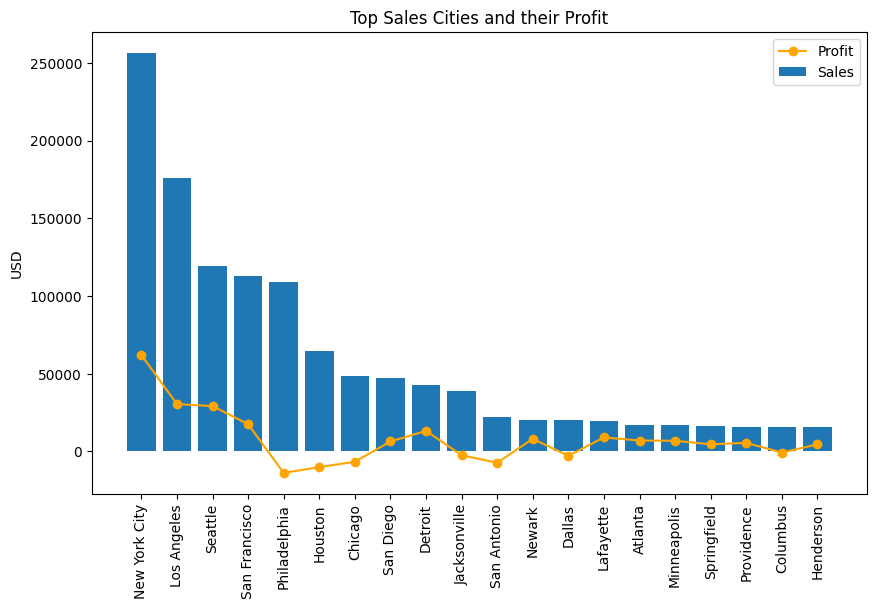

In [12]:
plt.figure(figsize=(10, 6))

# column plot of top sales cities sales
plt.bar(df_top_sales_cities['City'], df_top_sales_cities['Sales'], width=0.8, label='Sales', color='#1f77b4')

## line plot of top sales cities profit
# plt.bar(df_top_sales_cities['City'], df_top_sales_cities['Profit'], width=0.5, label='Profit', color='orange')
plt.plot(df_top_sales_cities['City'], df_top_sales_cities['Profit'], label='Profit', color='orange', marker='o')

# make it pretty
plt.xlabel('') # redundant
plt.ylabel('USD')
plt.title('Top Sales Cities and their Profit')
plt.xticks(rotation=90)
plt.legend()

# release the kraken
plt.show()

As we said before, some big sales cities can have negative profit.

## What are the Top 20 customers by Sales?

It was answered before:

In [13]:
# group by customer
df_grouped_by_customer = df.groupby('Customer ID').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# 20 top customers by sales
top_20_customers = df_grouped_by_customer.sort_values(by='Sales', ascending=False).head(20)
# print('### Top 20 Customers by Sales:')
# display(top_20_customers)

# we get the customers names from their IDs in a new dataframe
customers_names = df[df['Customer ID'].isin(top_20_customers['Customer ID'])][['Customer ID', 'Customer Name']].drop_duplicates()

# merge on ID
top_20_customers = top_20_customers.merge(customers_names, on='Customer ID', how='left')
print('### Top 20 Customers by Sales:')
display(top_20_customers)

### Top 20 Customers by Sales:


,Customer ID,Sales,Profit,Customer Name
0,SM-20320,25043.050,-1980.7393,Sean Miller
1,TC-20980,19052.218,8981.3239,Tamara Chand
2,RB-19360,15117.339,6976.0959,Raymond Buch
3,TA-21385,14595.620,4703.7883,Tom Ashbrook
4,AB-10105,14473.571,5444.8055,Adrian Barton
5,KL-16645,14175.229,806.8550,Ken Lonsdale
6,SC-20095,14142.334,5757.4119,Sanjit Chand
7,HL-15040,12873.298,5622.4292,Hunter Lopez
8,SE-20110,12209.438,2650.6769,Sanjit Engle
9,CC-12370,12129.072,2177.0493,Christopher Conant


## Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?

To tackle this we'll group by customer, sort descending by sales, and add a cumulative value column. Then we'll compare to reach the 80% of sales

In [14]:
# we sort by sales
df_grouped_by_customer_sorted = df_grouped_by_customer.sort_values(by='Sales', ascending=False).reset_index(drop=True).copy()

# add cumulative sales column
df_grouped_by_customer_sorted['cumulative_sales'] = df_grouped_by_customer_sorted['Sales'].cumsum()

# add cumulative percentage column
total_sales = df_grouped_by_customer['Sales'].sum()
df_grouped_by_customer_sorted['cumulative_percentage'] = df_grouped_by_customer_sorted['cumulative_sales'] / total_sales * 100
print('\n### Cumulative Sales & Percentage by Customer:')
display(df_grouped_by_customer_sorted)

# 20% customers
total_customers = len(df_grouped_by_customer_sorted)
top_20_customers = int(total_customers * 0.2)
print(f'\n### 20% of customers: {top_20_customers}')
print(f'\n### That means that in order to reach the 20% top customer sales, we need to reach the index {top_20_customers - 1}')
print('\n### or much more easy, just use len(total_customers) * 0.2')

# 80% sales is total_sales * 0.8


### Cumulative Sales & Percentage by Customer:


,Customer ID,Sales,Profit,cumulative_sales,cumulative_percentage
0,SM-20320,25043.050,-1980.7393,2.504305e+04,1.090155
1,TC-20980,19052.218,8981.3239,4.409527e+04,1.919522
2,RB-19360,15117.339,6976.0959,5.921261e+04,2.577598
3,TA-21385,14595.620,4703.7883,7.380823e+04,3.212964
4,AB-10105,14473.571,5444.8055,8.828180e+04,3.843016
...,...,...,...,...,...
788,RS-19870,22.328,9.5838,2.297157e+06,99.998111
789,MG-18205,16.739,-1.2453,2.297174e+06,99.998840
790,CJ-11875,16.520,1.6520,2.297191e+06,99.999559
791,LD-16855,5.304,0.4641,2.297196e+06,99.999790



### 20% of customers: 158

### That means that in order to reach the 20% top customer sales, we need to reach the index 157

### or much more easy, just use len(total_customers) * 0.2


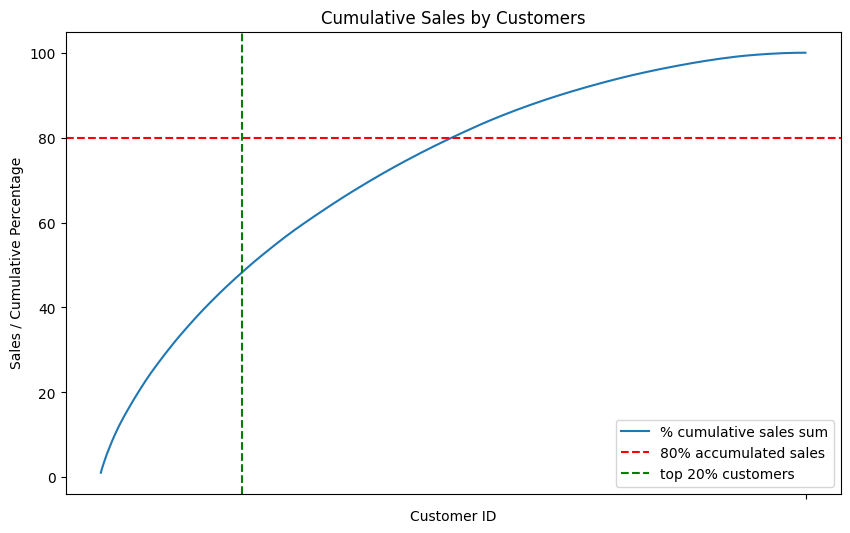

In [15]:
plt.figure(figsize=(10, 6))

# Plot cumulative sales
plt.plot(df_grouped_by_customer_sorted['Customer ID'], df_grouped_by_customer_sorted['cumulative_percentage'], label='% cumulative sales sum')

# vertical and horizontal lines
plt.axhline(y=80, color='r', linestyle='--', label='80% accumulated sales')
plt.axvline(x=0.2 * len(df_grouped_by_customer_sorted), color='g', linestyle='--', label='top 20% customers')

plt.title('Cumulative Sales by Customers')
plt.xlabel('Customer ID')
plt.ylabel('Sales / Cumulative Percentage')
plt.legend()
x_ticks = plt.xticks('')

plt.show()

As we see in the plot, Pareto Principle doesnt apply here (again)

## Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.

A limited publicity campaign in the top losing states might not be the best option due lossing risks. Also a general campaign by states would cost less than a campaign segmentated by cities.

I'd suggest some aggresive taylored campaings on the states with already close-to-loss range before losing them, then continue in a descending order:

In [16]:
df_grouped_by_state.sort_values(by='Profit', ascending=False).tail(15)

,State,Sales,Profit
17,Maine,1270.5300,454.4862
39,South Dakota,1315.5600,394.8283
32,North Dakota,919.9100,230.1497
46,West Virginia,1209.8240,185.9216
48,Wyoming,1603.1360,100.1960
35,Oregon,17431.1500,-1190.4705
8,Florida,89473.7080,-3399.3017
1,Arizona,35282.0010,-3427.9246
40,Tennessee,30661.8730,-5341.6936
4,Colorado,32108.1180,-6527.8579
